# 1- Implementation a Neural Network
In this problem you should train an artificial neural network (MLP and RBF) for classification of the given dataset.<br>
you should fill the missing sections to complete your neural network implementation.<br>
in this exercise you will:
- Tune the learning rate and regularization weight
- Implement the loss function for MLP
- Implement the forward pass and backward pass 
- visualize the train and validation accuracy versuse iteration


In [1]:
# initialization

import numpy as np
import matplotlib.pyplot as plt

from neural_net import MLPNet

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
  return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

## 1-1-1 Create a toy dataset
In this section we create a toy dataset containing 5 samples with 5 features.
The network has 6 neurons in the hidden layer and there are 3 classes in the output.
MLPNet class in the file neural_net.py will be used to instantiate our network . We use toy dataset with small size to check your implementaion and to see what happens to network weights during training.

In [2]:
# Create our network and toy dataset

features = 5
hidden_size = 6
classes = 3
inputs = 5
np.random.seed(0)

net = MLPNet(features, hidden_size, classes, std=1e-1)
X = 10 * np.random.randn(inputs, features)
y = np.array([1, 0, 0, 2, 1])

## 1-1-2- Forward pass
To run the following section, you should complete the loss function in the neural_net.py to compute scores . The output is a 5*3 matrix that contains the class score for each sample.

In [3]:
scores = net.loss(X)
for x in scores:
    print(x)
# print ('Your scores:\n',scores)

[array([-4.76888184, -0.31012331, -2.96622082, -3.65421661, -4.83108851,
        0.41385497]), array([ 0.53925742, -1.13732454,  1.33071509])]
[array([-1.07613449, -0.91277243, -1.11847698, -2.52745982, -1.04787432,
        1.42001821]), array([ 0.21951616, -0.26072075,  0.64730221])]
[array([-3.93358834e+00,  1.20895816e+00, -1.14667739e-03, -1.87757461e+00,
       -3.79877740e+00, -6.97610940e-01]), array([ 0.43493318, -0.6477387 ,  0.77415062])]
[array([-2.64241309, -0.04723502,  2.29682815, -5.08178134, -4.4985277 ,
        3.91738197]), array([ 1.00057299, -0.65759463,  1.40035202])]
[array([ 1.63023669, -2.04948118, -0.84690739, -1.89752301,  1.26031623,
        2.39110826]), array([0.06459671, 0.17639074, 0.24715522])]


## 1-1-3- Forward pass
Now you should complete the second missing part in loss function in the neural_net.py , the output shows the loss of your network

In [4]:
loss, _ = net.loss(X, y, reg=0.1)
print("your network loss is:",loss)

0
1
2
3
4
your network loss is: 8.272024469347615


## 1-1-4- Backward pass
compute the gradient according to weights and biases. 

In [5]:
loss, grads = net.loss(X, y, reg=0.1)
print('grads of W1\n',grads['W1'])
print('grads of b1\n',grads['b1'])
print('grads of W2\n',grads['W2'])
print('grads of b2\n',grads['b2'])

0
1
2
3
4
grads of W1
 [[ 0.35281047  0.45884894  1.32219612  0.44817864  0.3735116   0.51730313]
 [ 0.19001768  0.18635778 -0.13641938  0.0821197   0.02880871 -0.20796188]
 [ 0.15220755  0.42592875  0.35094614  0.06673487  0.29881581 -1.4719993 ]
 [ 0.06261354  0.0439062   0.55315285  0.13072372  0.17288724  2.19690758]
 [ 0.45395092  0.19473827 -0.29282689 -0.03743677  0.30655584 -1.35731788]]
grads of b1
 [ 5.55111512e-17 -5.97200545e-02 -6.52528459e-02  0.00000000e+00
  2.77555756e-17 -6.63374458e-02]
grads of W2
 [[ 0.56492089 -0.35672091 -1.72771535]
 [-0.74475308  0.47395839 -0.26762072]
 [ 0.44267662  0.46508342 -1.59719739]
 [-0.31033067  0.29352956 -1.48299687]
 [-0.17805049  0.05590789 -1.35912395]
 [ 0.62309422 -0.88470247  0.04705549]]
grads of b2
 [-0.13972057 -0.26520898  0.62658396]


## 1-1-5- Train the network
Fill the missing section in train and predict function of MLPNet class . After you correctly implement those function you build a two layer neural network that can feed data to it. The result of the following section shows Final training loss of your network and training loss versus iteration .

iteration 0
0
1
2
3
4
iteration 0 / 100: loss 7.435568
iteration 1
0
1
2
3
4
iteration 2
0
1
2
3
4
iteration 3
0
1
2
3
4
iteration 4
0
1
2
3
4
iteration 5
0
1
2
3
4
iteration 6
0
1
2
3
4
iteration 7
0
1
2
3
4
iteration 8
0
1
2
3
4
iteration 9
0
1
2
3
4
iteration 10
0
1
2
3
4
iteration 11
0
1
2
3
4
iteration 12
0
1
2
3
4
iteration 13
0
1
2
3
4
iteration 14
0
1
2
3
4
iteration 15
0
1
2
3
4
iteration 16
0
1
2
3
4
iteration 17
0
1
2
3
4
iteration 18
0
1
2
3
4
iteration 19
0
1
2
3
4
iteration 20
0
1
2
3
4


/home/sahar/Projects/Pattern/NeuralNets/neural_net.py:124: RuntimeWarning: divide by zero encountered in log
  loss[i] = -1 * np.log(self.softmax(scores[i][1], label)) + 1/2 * (np.sum(Weight1**2) + np.sum(Weight2**2))
/home/sahar/Projects/Pattern/NeuralNets/neural_net.py:40: RuntimeWarning: overflow encountered in exp
  exp = np.exp(X[indx])
/home/sahar/Projects/Pattern/NeuralNets/neural_net.py:41: RuntimeWarning: overflow encountered in exp
  return exp / np.sum(np.exp(X))
/home/sahar/Projects/Pattern/NeuralNets/neural_net.py:41: RuntimeWarning: invalid value encountered in double_scalars
  return exp / np.sum(np.exp(X))


iteration 21
0
1
2
3
4
iteration 22
0
1
2
3
4
iteration 23
0
1
2
3
4
iteration 24
0
1
2
3
4
iteration 25
0
1
2
3
4
iteration 26
0
1
2
3
4
iteration 27
0
1
2
3
4
iteration 28
0
1
2
3
4
iteration 29
0
1
2
3
4
iteration 30
0
1
2
3
4
iteration 31
0
1
2
3
4
iteration 32
0
1
2
3
4
iteration 33
0
1
2
3
4
iteration 34
0
1
2
3
4
iteration 35
0
1
2
3
4
iteration 36
0
1
2
3
4
iteration 37
0
1
2
3
4
iteration 38
0
1
2
3
4
iteration 39
0
1
2
3
4
iteration 40
0
1
2
3
4
iteration 41
0
1
2
3
4
iteration 42
0
1
2
3
4
iteration 43
0
1
2
3
4
iteration 44
0
1
2
3
4
iteration 45
0
1
2
3
4
iteration 46
0
1
2
3
4
iteration 47
0
1
2
3
4
iteration 48
0
1
2
3
4
iteration 49
0
1
2
3
4
iteration 50
0
1
2
3
4
iteration 51
0
1
2
3
4
iteration 52
0
1
2
3
4
iteration 53
0
1
2
3
4
iteration 54
0
1
2
3
4
iteration 55
0
1
2
3
4
iteration 56
0
1
2
3
4
iteration 57
0
1
2
3
4
iteration 58
0
1
2
3
4
iteration 59
0
1
2
3
4
iteration 60
0
1
2
3
4
iteration 61
0
1
2
3
4
iteration 62
0
1
2
3
4
iteration 63
0
1
2
3
4
iteration 6

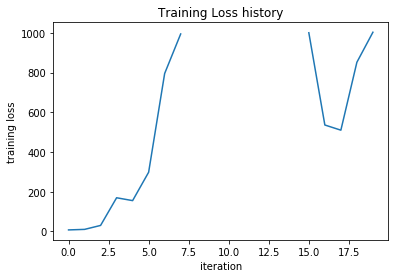

In [6]:
net = MLPNet(features, hidden_size, classes, std=1e-1)
stats = net.train(X, y, X, y,
            alpha=1e-1, reg=1e-5,
            num_iters=100)

print ('Final training loss: ', stats['loss_train'][-1])

# plot the loss history
plt.plot(stats['loss_train'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

## 1-1-6- Load data MNIST
In this section we use a real dataset.change root variable in dataloader.py to your dataset path.

In [7]:
from dataloader import select_features
import numpy as np
import os
from scipy.misc import imread
import cv2
import matplotlib.pyplot as plt
import matplotlib
val_num = 1000
train_num = 49000
test_num = 10000
train_data, train_labels, test_data, test_labels,\
    class_names, n_train, n_test, n_class, n_features = select_features()


# Subsample the data
mask = range(train_num, n_train)
X_val = train_data[mask]
y_val = train_labels[mask]
mask = range(train_num)
X_train = train_data[mask]
y_train = train_labels[mask]
mask = range(test_num)
X_test = test_data[mask]
y_test = test_labels[mask]

# # Normalize the data: subtract the mean image
# mean_image = np.mean(X_train, axis=0)
# X_train -= mean_image
# X_val -= mean_image
# X_test -= mean_image

print ('Train data shape: ', X_train.shape)
print ('Train labels shape: ', y_train.shape)
print ('Validation data shape: ', X_val.shape)
print ('Validation labels shape: ', y_val.shape)
print ('Test data shape: ', X_test.shape)
print ('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 784)
Train labels shape:  (49000,)
Validation data shape:  (11000, 784)
Validation labels shape:  (11000,)
Test data shape:  (10000, 784)
Test labels shape:  (10000,)


## 1-1-7- Train 
For training our neural network we will use SGD(Stochastic Gradient descent).The loss of your network must decrease during epochs.

In [ ]:
input_size = n_features
print(input_size)
hidden_size = 50
num_classes = 10
net = MLPNet(input_size, hidden_size, num_classes,std=1e-2)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=30000, batch_size=200,
            alpha=1e-4, alpha_decay=0.95,
            reg=0.5)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print ('Validation accuracy: ', val_acc)


784
iteration 0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
iteration 0 / 30000: loss 1321.991067
iteration 1


/home/sahar/Projects/Pattern/NeuralNets/neural_net.py:124: RuntimeWarning: divide by zero encountered in log
  loss[i] = -1 * np.log(self.softmax(scores[i][1], label)) + 1/2 * (np.sum(Weight1**2) + np.sum(Weight2**2))
/home/sahar/Projects/Pattern/NeuralNets/neural_net.py:41: RuntimeWarning: overflow encountered in exp
  return exp / np.sum(np.exp(X))
/home/sahar/Projects/Pattern/NeuralNets/neural_net.py:40: RuntimeWarning: overflow encountered in exp
  exp = np.exp(X[indx])
/home/sahar/Projects/Pattern/NeuralNets/neural_net.py:41: RuntimeWarning: invalid value encountered in double_scalars
  return exp / np.sum(np.exp(X))


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
iteration 2
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101


145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
iteration 13
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
iteration 14
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24

79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
iteration 25
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
15

iteration 36
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
iteration 37
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97


140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165


the below plots show loss during epochs and training and validatino accuracy versus epochs. The loss should decreas over time. ***according to second plot what is the best iteration number to terminate training?***

In [ ]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_train'])
plt.title('Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc'], label='train')
plt.plot(stats['val_acc'], label='val')
plt.title('Classification accuracy ')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

## 1-1-8- Tune network's hyperparameters
As you know hidden layer size, learning rate and weight regularization are important in developing a neural network so you should tune them and get a better result and report the best hyperparameters.

In [ ]:
best_net = None # store the best model into this 
#################################################################################
# Tune hyperparameters with validation set and store your best model in best_net#
#################################################################################
pass
#################################################################################
#                                END OF YOUR CODE                               #
#################################################################################


## 1-1-9- Test
Now you find the best hyperparameters, Let's test your network on test dataset and evaluate your accuracy.
**our baseline is 47% and for each 1% you get 1 extra bonus point**

In [ ]:
test_acc = (best_net.predict(X_test) == y_test).mean()
print ('Test accuracy: ', test_acc)

## 1-2-1- Scikit-learn without normalization
In this section you become familiar with Scikit-learn and implement an MLP network with that. Find the best parameters for best accuracy

In [ ]:
import numpy as np
from sklearn.neural_network import MLPClassifier


## 1-2-2- Test acc
test your network with test dataset and report accuracy

## 1-2-3- Scikit-learn with normalization
In this section we use previous code with just one change. befor you feed data to network normalized them . 

## 1-2-4- Test accuracy
Test again your network with test dataset.Do you see any progress in test accuracy against result of prevouis section?